##### <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Project 2 - Machine Learning using Scikit and AWS</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Friday, October 8 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

This project is about giving exposure about Machine learning, its usage, Cloud services and why they are helpful in analyzing Big Data.

In this Project, we are trying to analyze the crime data. This data is taken from <a href=https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data> here </a>. You have to download data from here, it should be around 1.6 GB in size. You will predict the type of crime that can happen given the features.

You have to complete all the four tasks and report your observations for each if any.

Note: Please post clarification questions on Piazza. 

# Task 1 - Read the data and filter the data you need

This is open ended, you can use any features you want and drop any one of them. The 'Primary Type' is our target variable which we will be predicting for.

This task is split into multiple parts:


1.   Print the Histogram of variable 'Primary Type'. The x-axis should be each primary type, and the y-axis will be the count of each Primary type.
2. Sort the histogram in decreasing order. This will help you to understand which Primary Type of crime occured more than the rest. 
3. Now, 'K' is the total number of classes in Primary Type. Experiment with K=2,3,4,5 as the most popular Primary Type data to be used and predicted. 
    4.  For a given K, filter the dataset to extract the most popular K Primary Types and report what percentage of the total dataset this amounts to. Lets call this percentage, F. Now, find what fraction of this filtered data can be supported in your analysis on your local machine. Lets call this P. For example, of the approximately 7 million entries, say for K=3, we find that the top three types of crime add up to around 3.5 million, which makes F be 50%. Now see if your machine can handle all 3.5 million entries in you ML analysis. Say you find out that you can only handle 60% of this, which means your working dataset will be 2.1 million entries.  
5.  For each K=2,3,4,5 (and associated percentage 'P'), you should train a model and report the accuracy. (Refer to other tasks)

Hint: Split the data into training and testing in the ratio of 80:20.

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure

In [2]:
data = pd.read_csv("Crimes_-_2001_to_Present.csv")
data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409404,12493745,JE387389,09/24/2021 03:50:00 PM,074XX W TALCOTT AVE,1513,PROSTITUTION,SOLICITING FOR BUSINESS,HOSPITAL BUILDING / GROUNDS,False,False,...,41.0,10.0,16,1125716.0,1938903.0,2021,10/01/2021 04:51:37 PM,41.988703,-87.812972,"(41.988702804, -87.81297224)"
7409405,12493068,JE386506,09/24/2021 10:00:00 AM,006XX E 131ST ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,9.0,54.0,07,1182890.0,1818558.0,2021,10/01/2021 04:51:37 PM,41.657322,-87.606425,"(41.657321724, -87.606425363)"
7409406,12497289,JE391669,09/18/2021 04:30:00 AM,016XX N LA SALLE DR,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,SIDEWALK,False,False,...,2.0,7.0,11,1174829.0,1911305.0,2021,10/01/2021 04:49:13 PM,41.912012,-87.633158,"(41.912012179, -87.633158199)"
7409407,12492677,JE385917,09/24/2021 04:13:00 PM,031XX N LAWNDALE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,30.0,21.0,08B,1151215.0,1920671.0,2021,10/01/2021 04:51:37 PM,41.938210,-87.719663,"(41.938209503, -87.719663144)"


In [10]:
data.keys()


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [11]:

'''['Primary Type','IUCR','Arrest','Domestic','Beat','District','Community Area','FBI Code',
           'Zip Codes','Ward','Police Districts','Police Beats']'''

data.keys()
data['Latitude']
data['Longitude']
data['Location']
data['X Coordinate']
data['Y Coordinate']

0          1875917.0
1          1904869.0
2                NaN
3          1920384.0
4          1900086.0
             ...    
7409404    1938903.0
7409405    1818558.0
7409406    1911305.0
7409407    1920671.0
7409408    1829789.0
Name: Y Coordinate, Length: 7409409, dtype: float64

In [16]:
print(len(data["Primary Type"].unique()))
print(len(data["IUCR"].unique()))
print(len(data["Arrest"].unique()))
print(len(data["Domestic"].unique()))
print(len(data["Beat"].unique()))
print(len(data["District"].unique()))
print(len(data["Community Area"].unique()))
print(len(data["FBI Code"].unique()))
#len(data["Zip Codes"].unique()))
print(len(data["Ward"].unique()))
print(len(data["District"].unique()))
print(len(data["Beat"].unique()))

'''['Primary Type','IUCR','Arrest','Domestic','Beat','District','Community Area','FBI Code',
           'Zip Codes','Wards','Police Districts','Police Beats']'''


36
402
2
2
304
25
79
26
51
25
304


"['Primary Type','IUCR','Arrest','Domestic','Beat','District','Community Area','FBI Code',\n           'Zip Codes','Wards','Police Districts','Police Beats']"

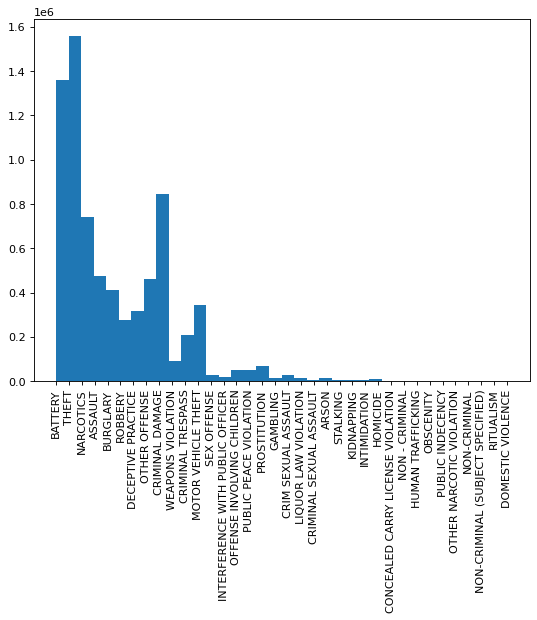

In [69]:
figure(figsize=(8, 6), dpi=80)
import matplotlib.pyplot as plt
plt.hist(data["Primary Type"], bins =36)
plt.xticks(rotation='vertical')

plt.show()



In [70]:


def count_elements(seq) -> dict:
    
    """Tally elements from `seq`."""
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted = count_elements(data["Primary Type"])
sorted_pair = {k: v for k, v in sorted(counted.items(), key=lambda item: -item[1])}

In [71]:
sorted_pair.keys()

dict_keys(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT', 'OTHER OFFENSE', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE', 'ROBBERY', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION', 'PROSTITUTION', 'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION', 'SEX OFFENSE', 'CRIM SEXUAL ASSAULT', 'INTERFERENCE WITH PUBLIC OFFICER', 'GAMBLING', 'LIQUOR LAW VIOLATION', 'ARSON', 'HOMICIDE', 'KIDNAPPING', 'INTIMIDATION', 'STALKING', 'CRIMINAL SEXUAL ASSAULT', 'CONCEALED CARRY LICENSE VIOLATION', 'OBSCENITY', 'PUBLIC INDECENCY', 'NON-CRIMINAL', 'OTHER NARCOTIC VIOLATION', 'HUMAN TRAFFICKING', 'NON - CRIMINAL', 'RITUALISM', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'DOMESTIC VIOLENCE'])

In [72]:
sorted_pair.values()

dict_values([1558882, 1359022, 844795, 739221, 474741, 460680, 412284, 341547, 317990, 278030, 207643, 92918, 69444, 52133, 51213, 28603, 27840, 17731, 14603, 14566, 12551, 11441, 7045, 4364, 4089, 3830, 806, 747, 187, 175, 140, 76, 38, 24, 9, 1])

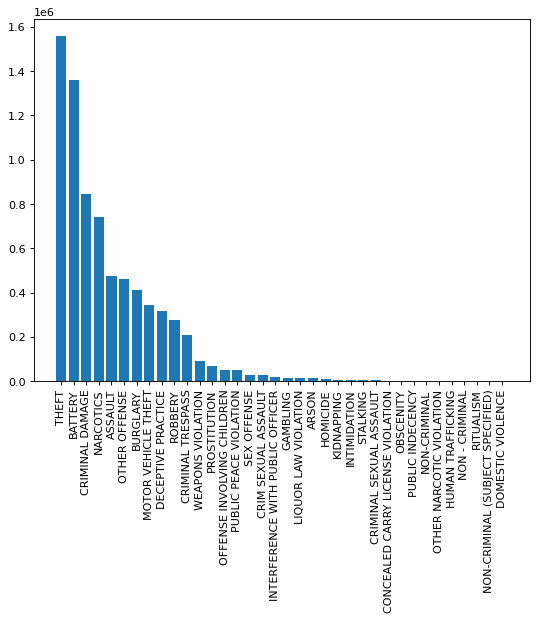

In [73]:
figure(figsize=(8, 6), dpi=80)
import matplotlib.pyplot as plt

plt.bar(sorted_pair.keys(), sorted_pair.values())
plt.xticks(rotation='vertical')
plt.show()

In [75]:
''' 
Now see if your machine can handle all 3.5 million entries in you ML analysis. 
Say you find out that you can only handle 60% of this, which means your working 
dataset will be 2.1 million entries.'''

" \nNow, 'K' is the total number of classes in Primary Type. \nExperiment with K=2,3,4,5 as the most popular Primary Type data to be used and predicted.\nFor a given K, filter the dataset to extract the most popular K Primary Types and report what \npercentage of the total dataset this amounts to. Lets call this percentage, F.\nNow, find what fraction of this filtered data can be supported in your analysis on your local machine.\nLets call this P. \n\nFor example, of the approximately 7 million entries, \nsay for K=3,\nwe find that the top three types of crime add up to around 3.5 million, which makes F be 50%. \nNow see if your machine can handle all 3.5 million entries in you ML analysis. \nSay you find out that you can only handle 60% of this, which means your working \ndataset will be 2.1 million entries."

In [98]:
## Percentage of the total dataset K top primary types amounts to

K = 2
a = list(sorted_pair.values())
a_arr = np.array(a)
F = a_arr[:K].sum()/a_arr.sum()
print("F {} %".format(F*100))

F 39.38106264615707 %


# Task 2 - Convert the features in a form that can be given as input to scikit library/functions

Here you have to search a little bit. The data that we are using has data other than numerical values. The model takes values as numerical or categorical data. You need to convert the input data to either one of these forms. 

In [65]:

data.dtypes

'''Primary Type','IUCR','Arrest',
'Domestic','Beat','District','Community Area','FBI Code',
'Zip Codes','Wards','Police Districts','Police Beats'''

"Primary Type','IUCR','Arrest',\n'Domestic','Beat','District','Community Area','FBI Code',\n'Zip Codes','Wards','Police Districts','Police Beats"

In [59]:
print(len(data["Primary Type"].unique()))
print(len(data["IUCR"].unique()))
print(len(data["Arrest"].unique()))
print(len(data["Domestic"].unique()))
print(len(data["Beat"].unique()))
print(len(data["District"].unique()))
print(len(data["Community Area"].unique()))
print(len(data["FBI Code"].unique()))
print(len(data["Ward"].unique()))
print(len(data["District"].unique()))
data

36
402
2
2
304
25
79
26
51
25


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409404,12493745,JE387389,09/24/2021 03:50:00 PM,074XX W TALCOTT AVE,1513,PROSTITUTION,SOLICITING FOR BUSINESS,HOSPITAL BUILDING / GROUNDS,False,False,...,41.0,10.0,16,1125716.0,1938903.0,2021,10/01/2021 04:51:37 PM,41.988703,-87.812972,"(41.988702804, -87.81297224)"
7409405,12493068,JE386506,09/24/2021 10:00:00 AM,006XX E 131ST ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,9.0,54.0,07,1182890.0,1818558.0,2021,10/01/2021 04:51:37 PM,41.657322,-87.606425,"(41.657321724, -87.606425363)"
7409406,12497289,JE391669,09/18/2021 04:30:00 AM,016XX N LA SALLE DR,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,SIDEWALK,False,False,...,2.0,7.0,11,1174829.0,1911305.0,2021,10/01/2021 04:49:13 PM,41.912012,-87.633158,"(41.912012179, -87.633158199)"
7409407,12492677,JE385917,09/24/2021 04:13:00 PM,031XX N LAWNDALE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,30.0,21.0,08B,1151215.0,1920671.0,2021,10/01/2021 04:51:37 PM,41.938210,-87.719663,"(41.938209503, -87.719663144)"


In [56]:
from sklearn.preprocessing import LabelEncoder

import pandas as pd
# creating instance of labelencoder
labelencoder = LabelEncoder()

data_cat = pd.DataFrame(data["Primary Type"], columns=['Primary Type'])
# Assigning numerical values and storing in another column
data_cat['Primary_Type_Cat'] = labelencoder.fit_transform(data_cat['Primary Type'])
## IUCR categorize
data_cat['IUCR_Cat'] = labelencoder.fit_transform(data['IUCR'])
 
data_cat['FBI_Code_Cat'] = labelencoder.fit_transform(data['FBI Code'])

data_cat['Beat_Cat'] = labelencoder.fit_transform(data['Beat'])
print(data["FBI Code"].unique())

data.keys()
'''Primary Type','IUCR','Arrest',
'Domestic','Beat','District','Community Area','FBI Code',
'Zip Codes','Wards','Police Districts','Police Beats'''

['08B' '06' '18' '08A' '05' '03' '11' '26' '04B' '14' '15' '10' '07' '17'
 '04A' '24' '20' '02' '16' '19' '22' '09' '12' '13' '01A' '01B']


"Primary Type','IUCR','Arrest',\n'Domestic','Beat','District','Community Area','FBI Code',\n'Zip Codes','Wards','Police Districts','Police Beats"

In [50]:
'''Primary Type','IUCR','Arrest',
'Domestic','Beat','District','Community Area','FBI Code',
'Zip Codes','Wards','Police Districts','Police Beats'''

print(data["District"].unique())
print(data["Ward"].unique())
print(data["Community Area"].unique())
print(data["FBI Code"].unique())
print(data["Beat"].unique())



[ 9. 15.  6. 14. 10. 12.  8. 16.  5.  2.  4. 22.  3.  1.  7. 11. 17. 20.
 25. 18. 19. 24. 31. nan 21.]
[12. 29.  8. 35. 28. 21. 32. 25. 27. 15. 13. 45. 34.  4.  1. 10. 38.  5.
  7.  2. 20. 39. 24. 40.  6. 37. 16.  3. 42. 46. 23.  9. 19. 50. 44. 47.
 11. 48. 49. 26. 33. 22. 30. 18. 43. 31. 36. 17. 14. 41. nan]
[61. 25. 44. 21. 71. 24. 31. 27. 63. 65. 11. 49. 39. 51. 15. 52. 12. 43.
 46. 32. 68. 14. 29.  2. 69. 23. 35.  8.  3.  6. 56. 28. 53. 50. 33. 13.
 74. 19. 45. 72. 22. 64.  7.  5. 26. 66. 59. 77.  1. 10. 67. 38. 41. 60.
 30. 54. 58. 48. 73. 70. 40. 34. 16. 18.  4. 17. 42. 37. 75. 62. 20. 57.
 76. 47. nan  9. 36. 55.  0.]
['08B' '06' '18' '08A' '05' '03' '11' '26' '04B' '14' '15' '10' '07' '17'
 '04A' '24' '20' '02' '16' '19' '22' '09' '12' '13' '01A' '01B']
[ 924 1511  631 1412 1522  614 1434 1034 1222  824  833 1623  512  222
 1424  612 1531  434 2221 1633  432  331  421  422  123  711 1213 1124
 1722 1014 2011  722 2534  712  213 1831  723 1134  323 1135 1913 1925
  633  811 1712

In [60]:
data.keys()

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [63]:
data.isnull().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      8573
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614837
Community Area          613479
FBI Code                     0
X Coordinate             74251
Y Coordinate             74251
Year                         0
Updated On                   0
Latitude                 74251
Longitude                74251
Location                 74251
dtype: int64

In [64]:
print(len(data['Block'].unique()))


61766


In [121]:
print(len(data['Block'].unique()))
print(len(data['IUCR'].unique()))
print(data['IUCR'].value_counts())
print(len(data['Location Description'].unique()))

61766
402
0820    602415
0486    579259
0460    540814
1320    395791
1310    391036
         ...  
1633         1
1624         1
1521         1
0830         1
9901         1
Name: IUCR, Length: 402, dtype: int64
215


ID                         int64
Case Number               object
Date                      object
Block                     object
IUCR                    category
Primary Type              object
Description               object
Location Description      object
Arrest                      bool
Domestic                    bool
Beat                       int64
District                 float64
Ward                     float64
Community Area           float64
FBI Code                  object
X Coordinate             float64
Y Coordinate             float64
Year                       int64
Updated On                object
Latitude                 float64
Longitude                float64
Location                  object
IUCR_cat                   int16
dtype: object

0          35600
1           7903
2          54582
3          30564
4            427
           ...  
7409404    52338
7409405     5968
7409406    14937
7409407    27217
7409408    60218
Name: Block, Length: 7409409, dtype: category
Categories (61766, int64): [0, 1, 2, 3, ..., 61762, 61763, 61764, 61765]

# Task 3 - Build the model

Once the features are converted to the form accepted by scikit library, you have to build a machine learning model. Given the features predict the type of crime. 
Report the accuracy, F1, Precision and Recall of the model.

In [130]:
data['Block'] = data['Block'].astype('category')
data['Block'] = data['Block'].cat.codes
print(len(data['Block'].unique()))
data['Block']

61766


0          35600
1           7903
2          54582
3          30564
4            427
           ...  
7409404    52338
7409405     5968
7409406    14937
7409407    27217
7409408    60218
Name: Block, Length: 7409409, dtype: int32

# Task 4 - Run the model on your laptop and AWS cloud and observe the time taken for reading the data, training and testing, report the same.  

Report your observations. Due to more RAM needed for the same, it might be the case that it doesn't run on your laptop, so in that case report your laptop configuration and state it didnt run.

# Task 5 - Run K-fold cross validation and report the accuracy for a cv = 5. 
Report the total amount of time taken to run it on your laptop and AWS